In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import isodate
import kagglehub
import os

In [7]:
# Download latest version
current_dir = os.getcwd()
path = kagglehub.dataset_download("irkaal/foodcom-recipes-and-reviews")

print("Path to dataset files:", path)

100%|██████████| 723M/723M [01:06<00:00, 11.5MB/s] 

Extracting files...


Path to dataset files: C:\Users\spadr\.cache\kagglehub\datasets\irkaal\foodcom-recipes-and-reviews\versions\2


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
dfRec = pd.read_csv('..\\data\\recipes.csv')

In [4]:
dfRev = pd.read_csv('..\\data\\reviews.csv')

In [5]:
dfRev.head(25)
# print(dfRev['Review'].head(10).tolist())

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z
5,17,5221,2046,Gay Gilmore ckpt,4,"love it, but without the bean sprouts.",2000-05-08T11:08:00Z,2000-05-08T11:08:00Z
6,19,13307,2046,Gay Gilmore ckpt,5,"chewy goodness, not crispy at all. i even thre...",2000-05-21T16:59:00Z,2000-05-21T16:59:00Z
7,21,148,2156,Darlene Blythe,0,Would someone please check the Nutrition Facts...,2000-06-02T10:01:00Z,2000-06-02T10:01:00Z
8,22,517,2046,Gay Gilmore ckpt,5,thought this was terrific!,2000-02-25T09:02:00Z,2000-02-25T09:02:00Z
9,23,4684,2046,Gay Gilmore ckpt,5,this is absolutely delicious. i even served i...,2000-02-25T09:06:00Z,2000-02-25T09:06:00Z


In [7]:
dfRec.head(10)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."
5,43,Best Blackbottom Pie,34879,Barefoot Beachcomber,PT2H,PT20M,PT2H20M,1999-08-21T10:35:00Z,Make and share this Best Blackbottom Pie recip...,character(0),Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""1 1/4"", ""1/4"", ""6"", ""1/3"", ""1/4"", ""1/4"", ""2...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",1.0,1.0,437.9,19.3,10.9,94.3,267.6,58.0,1.8,42.5,7.0,8.0,1 9-inch pie,"c(""Graham Cracker Crust: In small bowl, combin..."
6,44,Warm Chicken A La King,1596,Joan Edington,PT3M,PT35M,PT38M,1999-09-17T04:47:00Z,I copied this one out of a friend's book so ma...,"""https://img.sndimg.com/food/image/upload/w_55...",Chicken,"c(""Poultry"", ""Meat"", ""< 60 Mins"")","c(""12"", ""2"", ""3"", ""450"", ""1"", ""2"", ""1/4"", ""1"",...","c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...",5.0,23.0,895.5,66.8,31.9,405.8,557.2,29.1,3.1,5.0,45.3,2.0,NaN,"c(""Melt 1 1/2 ozs butter, add the flour and co..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,tristitia,PT50M,PT30M,PT1H20M,1999-08-06T00:40:00Z,Make and share this Buttermilk Pie With Ginger...,"""https://img.sndimg.com/food/image/upload/w_55...",Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""3/4"", "

# Data Exploration

## Recipe Dataset

In [5]:
dfRec.info()
dfRec.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   RecipeId             522517 non-null  int64  
 1   Name                 522517 non-null  object 
 2   AuthorId             522517 non-null  int64  
 3   TotalTime            522517 non-null  object 
 4   RecipeCategory       522517 non-null  object 
 5   AggregatedRating     522517 non-null  float64
 6   ReviewCount          522517 non-null  float64
 7   Calories             522517 non-null  float64
 8   FatContent           522517 non-null  float64
 9   SaturatedFatContent  522517 non-null  float64
 10  CholesterolContent   522517 non-null  float64
 11  SodiumContent        522517 non-null  float64
 12  CarbohydrateContent  522517 non-null  float64
 13  FiberContent         522517 non-null  float64
 14  SugarContent         522517 non-null  float64
 15  ProteinContent   

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
count,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000
mean,271821.436970,4.572585e+07,3.598794,2.751656,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510
std,155495.878422,2.929714e+08,1.160894,15.015307,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837
min,38.000000,2.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,137206.000000,6.947400e+04,2.500000,0.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000
50%,271758.000000,2.389370e+05,3.000000,1.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000
75%,406145.000000,5.658280e+05,5.000000,2.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000


In [ ]:
recipe_category_counts = dfRec['RecipeCategory'].value_counts()
top_10_counts = recipe_category_counts.head(25) # Select only the top 25 categories
other_count = recipe_category_counts.iloc[25:].sum()
top_10_with_other = pd.concat([top_10_counts, pd.Series({'Other':other_count})])

plt.figure(figsize=(10, 6))
plt.pie(top_10_with_other, labels=top_10_with_other.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Recipe Categories')
plt.show()

### Data Cleaning

In [18]:
dfRec.drop(columns=['Images', 'RecipeYield','AuthorName', 'DatePublished', 'CookTime', 'PrepTime',
                    'RecipeIngredientQuantities', 'RecipeServings', 'RecipeInstructions', 'Keywords',
                    'Description', 'RecipeIngredientParts', 'AuthorId'
                    ], inplace=True)

# Deal with null values:
# dfRec['CookTime'].fillna(0, inplace=True) # NaN means no cooking required
dfRec['ReviewCount'].fillna(0, inplace=True) # NaN means no reviews
dfRec['AggregatedRating'].fillna(2.5, inplace=True) # Use a neutral value even though median is 5.0 and mean 4.6 since we have no indication of quality
# dfRec['RecipeServings'].fillna(dfRec['RecipeServings'].median(), inplace=True)
# dfRec['Description'].fillna('', inplace=True) # Put empty description
dfRec['RecipeCategory'].fillna(dfRec['Name'], inplace=True) # Substitute category with recipe name
# dfRec['Keywords'].fillna(dfRec['RecipeIngredientParts'], inplace=True) # Substitute with ingredients, any better ideas?
# dfRec['RecipeIngredientQuantities'].fillna('c("0")',inplace=True) # There are only 3 missing
dfRec.rename({'RecipeId' : 'recipe_id'}, axis=1, inplace=True)

def safe_parse_duration(duration):
    try:
        if duration:  # Check if the string is not empty
            return isodate.parse_duration(duration).total_seconds()
        else:
            return None  # Return None for empty strings
    except Exception as e:
        print(f"Error parsing duration {duration}: {e}")
        return 0
    
# Apply the function to parse durations
dfRec['TotalTime'] = dfRec['TotalTime'].apply(safe_parse_duration)
dfRec.info()

Error parsing duration PT-2M: Unrecognised ISO 8601 date format: ''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   recipe_id            522517 non-null  int64  
 1   Name                 522517 non-null  object 
 2   TotalTime            522517 non-null  float64
 3   RecipeCategory       522517 non-null  object 
 4   AggregatedRating     522517 non-null  float64
 5   ReviewCount          522517 non-null  float64
 6   Calories             522517 non-null  float64
 7   FatContent           522517 non-null  float64
 8   SaturatedFatContent  522517 non-null  float64
 9   CholesterolContent   522517 non-null  float64
 10  SodiumContent        522517 non-null  float64
 11  CarbohydrateContent  522517 non-null  float64
 12  FiberContent         522517 non-null  float64
 13  SugarContent         522517 non-null  float64
 14  

In [19]:
dfRec.describe()

,recipe_id,TotalTime,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
count,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000
mean,271821.436970,1.527008e+04,3.598794,2.751656,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510
std,155495.878422,3.744767e+06,1.160894,15.015307,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837
min,38.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,137206.000000,1.200000e+03,2.500000,0.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000
50%,271758.000000,2.400000e+03,3.000000,1.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000
75%,406145.000000,4.200000e+03,5.000000,2.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000
max,541383.000000,2.613168e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000


### Dataset Splitting and Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

num_feature_columns = [
    'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
    'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
    'CarbohydrateContent', 'FiberContent', 'SugarContent',
    'ProteinContent', 'TotalTime'
]

recipe_scaler = StandardScaler()

dfRec[num_feature_columns] = recipe_scaler.fit_transform(dfRec[num_feature_columns])

In [21]:
dfRec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   recipe_id            522517 non-null  int64  
 1   Name                 522517 non-null  object 
 2   TotalTime            522517 non-null  float64
 3   RecipeCategory       522517 non-null  object 
 4   AggregatedRating     522517 non-null  float64
 5   ReviewCount          522517 non-null  float64
 6   Calories             522517 non-null  float64
 7   FatContent           522517 non-null  float64
 8   SaturatedFatContent  522517 non-null  float64
 9   CholesterolContent   522517 non-null  float64
 10  SodiumContent        522517 non-null  float64
 11  CarbohydrateContent  522517 non-null  float64
 12  FiberContent         522517 non-null  float64
 13  SugarContent         522517 non-null  float64
 14  ProteinContent       522517 non-null  float64
dtypes: float64(12), i

## Review Dataset

In [4]:
dfRev.info()
dfRev.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


,ReviewId,RecipeId,AuthorId,Rating
count,1.401982e+06,1.401982e+06,1.401982e+06,1.401982e+06
mean,8.179739e+05,1.526412e+05,1.558638e+08,4.407951e+00
std,5.280821e+05,1.301112e+05,5.305111e+08,1.272012e+00
min,2.000000e+00,3.800000e+01,1.533000e+03,0.000000e+00
25%,3.743862e+05,4.703875e+04,1.336800e+05,4.000000e+00
50%,7.717805e+05,1.093270e+05,3.305450e+05,5.000000e+00
75%,1.204126e+06,2.318768e+05,8.183590e+05,5.000000e+00
max,2.090347e+06,5.412980e+05,2.002902e+09,5.000000e+00


### Data Cleaning

In [6]:
dfRev['Review'].fillna('', inplace=True) # Put empty description for now
dfRev.drop(columns=['DateSubmitted', 'AuthorName'], inplace=True) # Only keep DateModified
dfRev['DateModified'] = pd.to_datetime(dfRev['DateModified'])
dfRev['year'] = dfRev['DateModified'].dt.year
dfRev['month'] = dfRev['DateModified'].dt.month
dfRev['month_sin'] = np.sin(2 * np.pi * dfRev['month'] / 12) # cyclic enconding for month (so Dec and Jan are close to one another)
dfRev['month_cos'] = np.cos(2 * np.pi * dfRev['month'] / 12)
dfRev.drop(columns=['DateModified', 'month'], inplace=True)


In [7]:
dfRev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ReviewId   1401982 non-null  int64  
 1   RecipeId   1401982 non-null  int64  
 2   AuthorId   1401982 non-null  int64  
 3   Rating     1401982 non-null  int64  
 4   Review     1401982 non-null  object 
 5   year       1401982 non-null  int32  
 6   month_sin  1401982 non-null  float64
 7   month_cos  1401982 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 80.2+ MB


<Axes: ylabel='Frequency'>

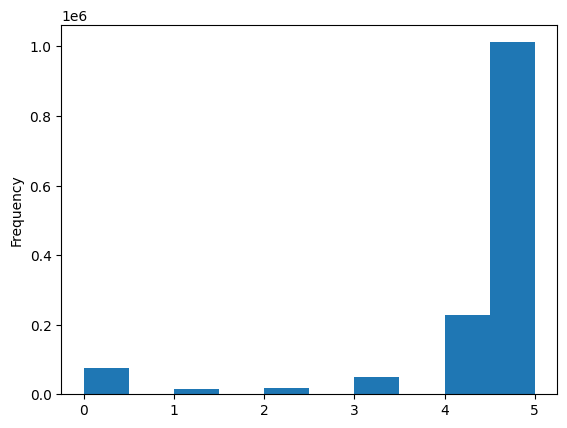

In [12]:
dfRev['Rating'].plot(kind='hist')

In [8]:
from sklearn.preprocessing import StandardScaler
review_scaler = StandardScaler() # tried QuantileTransformer and PowerTransformer but the data is still very skewed
num_feature_columns = ['Rating', 'year']

dfRev[num_feature_columns] = review_scaler.fit_transform(dfRev[num_feature_columns])

In [15]:
dfRev.rename(columns={'AuthorId' : 'user_id', 'RecipeId' : 'recipe_id'}, inplace=True)

In [20]:
dfRev.head()

,ReviewId,recipe_id,user_id,Rating,Review,year,month_sin,month_cos
0,2,992,2008,0.465443,better than any you can get at a restaurant!,-2.412021,0.500000,8.660254e-01
1,7,4384,1634,-0.320713,"I cut back on the mayo, and made up the differ...",-2.142158,-0.866025,5.000000e-01
2,9,4523,2046,-1.893027,i think i did something wrong because i could ...,-2.412021,0.866025,5.000000e-01
3,13,7435,1773,0.465443,easily the best i have ever had. juicy flavor...,-2.412021,1.000000,6.123234e-17
4,14,44,2085,0.465443,An excellent dish.,-2.412021,1.000000,6.123234e-17


# User and Recipe Embeddings

In [30]:
from sentence_transformers import SentenceTransformer
from tqdm.notebook import tqdm

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

batch_size = 1000
# reviews = train_review_data['Review'].tolist()

# review_embeddings = []

def make_embeddings(dataframe, column_name):
    embedding_list = []
    column = dataframe[column_name].tolist()
    for i in tqdm(range(0, len(column), batch_size), desc=f"Encoding {column_name}"):
        batch = column[i:i+batch_size]
        batch_embeddings = model.encode(batch, show_progress_bar=False)
        embedding_list.append(batch_embeddings)
        
    return np.vstack(embedding_list)

recipe_name_embeddings = make_embeddings(dfRec, 'Name')
category_embeddings = make_embeddings(dfRec, 'RecipeCategory')

2024-12-11 16:14:42,248 INFO: Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2024-12-11 16:15:13,144 INFO: Use pytorch device: cuda


Encoding Name:   0%|          | 0/523 [00:00<?, ?it/s]

Encoding RecipeCategory:   0%|          | 0/523 [00:00<?, ?it/s]

In [31]:
dfRec['Name'] = list(recipe_name_embeddings)
dfRec['RecipeCategory'] = list(category_embeddings)

In [32]:
dfRec.head()

,recipe_id,Name,TotalTime,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,38,"[-0.033777624, -0.035758555, -0.0029685618, 0....",0.019716,"[-0.0044021816, -0.03929914, -0.010588055, 0.0...",0.776304,0.083138,-0.224419,-0.198366,-0.177156,-0.259902,-0.175436,-0.066303,-0.028274,0.058349,-0.355593
1,39,"[-0.013927445, 0.0765494, -0.0049899016, 0.020...",0.000168,"[-0.046632297, -0.0098071555, -0.014670166, 0....",-0.515805,-0.116658,0.448253,0.306632,0.151011,0.948098,-0.094886,0.195280,0.599403,-0.010365,1.144577
2,40,"[-0.0930801, 0.028245026, 0.008863165, 0.00227...",-0.003517,"[-0.008012931, -0.024870146, -0.028842142, 0.0...",0.776304,0.482731,-0.124069,-0.218996,-0.205039,-0.286393,-0.182097,0.179242,-0.400230,0.387896,-0.427860
3,41,"[-0.05175421, -0.044217587, -0.042856216, 0.04...",0.019315,"[-0.07450178, -0.08545357, -0.037958466, 0.061...",0.776304,-0.050059,0.036977,-0.005516,-0.123534,-0.286393,0.188251,0.083568,1.564166,0.071671,0.294813
4,42,"[-0.08092271, 0.048180193, 0.0033225175, 0.062...",-0.003277,"[-0.029408956, 0.010818674, -0.07821881, 0.070...",0.776304,0.549330,-0.272589,-0.217202,-0.202894,-0.286393,0.045684,-0.132667,0.111210,-0.029296,-0.328181


In [9]:
review_df = dfRev[['AuthorId', 'RecipeId', 'Rating', 'year', 'month_sin', 'month_cos']].copy()

In [ ]:
review_embeddings_df = dfRev[['']]

In [17]:
review_df.head()

,AuthorId,RecipeId,Rating,year,month_sin,month_cos
0,2008,992,0.465443,-2.412021,0.500000,8.660254e-01
1,1634,4384,-0.320713,-2.142158,-0.866025,5.000000e-01
2,2046,4523,-1.893027,-2.412021,0.866025,5.000000e-01
3,1773,7435,0.465443,-2.412021,1.000000,6.123234e-17
4,2085,44,0.465443,-2.412021,1.000000,6.123234e-17


In [12]:
review_df.shape

(1401982, 6)

In [11]:
len(review_df['AuthorId'].unique())

271907

In [45]:
len(dfRec['recipe_id'].unique())


522517

In [46]:
dfRec.duplicated(subset=['recipe_id'])

0         False
1         False
2         False
3         False
4         False
          ...  
522512    False
522513    False
522514    False
522515    False
522516    False
Length: 522517, dtype: bool

## Make Hopsworks Feature Group

In [12]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

2024-12-12 23:14:56,029 INFO: Initializing external client
2024-12-12 23:14:56,030 INFO: Base URL: https://c.app.hopsworks.ai:443
2024-12-12 23:15:02,933 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1193139


In [13]:
# Get or create the 'Reviews' feature group
review_fg = fs.get_or_create_feature_group(
    name="review",
    version=2,
    description="Reviews for recipe recommender system.",
    primary_key=['recipeid']
)

In [34]:
# Get or create the 'Reviews' feature group
recipe_fg = fs.get_or_create_feature_group(
    name="recipe",
    version=2,
    description="Recipes for recipe recommender system.",
    primary_key=['recipe_id']
)

In [26]:
# Get or create the 'Reviews' feature group
review_fg = fs.get_or_create_feature_group(
    name="review",
    version=2,
    description="Review embedding for recipes",
    primary_key=['ReviewId']
)

In [27]:
print(review_df.shape)

NameError: name 'review_df' is not defined

In [28]:
dfRev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ReviewId   1401982 non-null  int64  
 1   recipe_id  1401982 non-null  int64  
 2   user_id    1401982 non-null  int64  
 3   Rating     1401982 non-null  float64
 4   Review     1401982 non-null  object 
 5   year       1401982 non-null  float64
 6   month_sin  1401982 non-null  float64
 7   month_cos  1401982 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 85.6+ MB


In [29]:
# Insert data into feature group
review_fg.insert(dfRev)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1193139/fs/1181782/fg/1384835


Uploading Dataframe: 100.00% |██████████| Rows 1401982/1401982 | Elapsed Time: 01:09 | Remaining Time: 00:00


Launching job: review_embedding_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1193139/jobs/named/review_embedding_1_offline_fg_materialization/executions


(Job('review_embedding_1_offline_fg_materialization', 'SPARK'), None)

In [36]:
recipe_fg.insert(dfRec)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1193139/fs/1181782/fg/1385843


Uploading Dataframe: 100.00% |██████████| Rows 522517/522517 | Elapsed Time: 12:10 | Remaining Time: 00:00


Launching job: recipe_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1193139/jobs/named/recipe_2_offline_fg_materialization/executions


(Job('recipe_2_offline_fg_materialization', 'SPARK'), None)

In [ ]:
feature_descriptions = [
    {"name": "reviewid", "description": "Unique identifier for each review"},
    {"name": "recipeid", "description": "Identifier for the recipe being reviewed"},
    {"name": "authorid", "description": "Identifier for the author of the review"},
    {"name": "rating", "description": "Rating given by the author to the recipe (usually 1-5)"},
    {"name": "review", "description": "Numerical representation of the review text (embedding vector from SentenceTransformer)"},
    {"name": "year", "description": "Year when the review was last modified"}
    {"name": "month_sin", "description": "Year when the review was last modified"}
    {"name": "month_cos", "description": "Year when the review was last modified"}
]

for desc in feature_descriptions: 
    review_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
feature_descriptions = [
    {"name": "reviewid", "description": "Unique identifier for each review"},
    {"name": "recipeid", "description": "Identifier for the recipe being reviewed"},
    {"name": "authorid", "description": "Identifier for the author of the review"},
    {"name": "rating", "description": "Rating given by the author to the recipe (usually 1-5)"},
    {"name": "review", "description": "Numerical representation of the review text (embedding vector from SentenceTransformer)"},
    {"name": "year", "description": "Year when the review was last modified"}
    {"name": "month_sin", "description": "Year when the review was last modified"}
    {"name": "month_cos", "description": "Year when the review was last modified"}
]

for desc in feature_descriptions: 
    recipe_fg.update_feature_description(desc["name"], desc["description"])

In [100]:
train_review_data.columns

Index(['reviewid', 'recipeid', 'authorid', 'rating', 'review', 'year',
       'month_sin', 'month_cos'],
      dtype='object')

In [101]:
train_recipe_data.columns

Index(['recipeid', 'name', 'authorid', 'totaltime', 'recipecategory',
       'aggregatedrating', 'reviewcount', 'calories', 'fatcontent',
       'saturatedfatcontent', 'cholesterolcontent', 'sodiumcontent',
       'carbohydratecontent', 'fibercontent', 'sugarcontent',
       'proteincontent'],
      dtype='object')

In [121]:
# Filter out reviews without a matching RecipeId in the recipe dataset
valid_recipe_ids = set(recipe_ids) 
print(len(valid_recipe_ids))
train_review_data = train_review_data[train_review_data["recipeid"].isin(recipe_ids)]

418013


In [212]:
train_review_data.shape

(397019, 8)